<a href="https://colab.research.google.com/github/antonysandesh/image-classification/blob/main/ML_MINOR_JAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data =  []

DATADIR = '/content/drive/MyDrive/mini project data'
CATEGORIES = ['apple', 'banana']


for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        #print(img_array.shape)
        #plt.imshow(img_array)
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [80]:
flat_data

array([[1.        , 0.99803922, 0.16601307, ..., 1.        , 0.99803922,
        0.16601307],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.95294118, 0.95294118, 0.96078431, ..., 0.91764706, 0.91764706,
        0.91764706],
       [0.98724183, 0.91910135, 0.69803922, ..., 0.83137255, 0.69019608,
        0.47697708]])

In [81]:
 target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

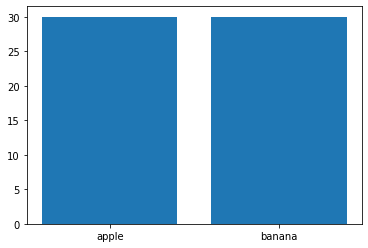

In [82]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [83]:
#split data into training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid =[     {'C':[1,10,100,1000],'kernel':['linear']},
                  {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},             
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [86]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [88]:
accuracy_score(y_pred,y_test)

0.8333333333333334

In [89]:
confusion_matrix(y_pred,y_test)

array([[8, 0],
       [3, 7]])